<a href="https://colab.research.google.com/github/Shrsh/LSTM_and_RNN_Experiments/blob/master/Deep_Learning_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
from sklearn.metrics import r2_score
import sys
import os
from numpy import linalg as LA
from keras.utils import to_categorical
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")


import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
# **** change the warning level ****
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import random
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

1 Physical GPUs, 1 Logical GPUs


#RNN for Autoregressive Model

Generate samples of an Auto Regressive model
of the form
X(t) = $a_{1}$X(t − 1) + $a_2$X(t − 2) + $a_3$X(t − 3) + U(t)

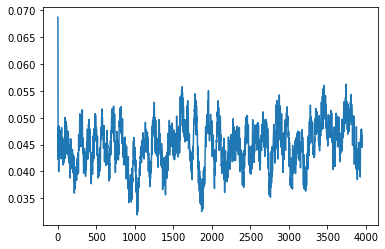

In [6]:
def moving_average(a, n=50) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def convertToMatrix(data, step):
  X, Y =[], []
  for i in range(len(data)-step):
    d=i+step  
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

def prepare_for_RNN(X,step=3):
  #preparing data for RNN, arranging data in step 

  train = np.array(X[0:1999])
  test = np.array(X[2000:3999])

  # convert into dataset matrix
  # add step elements into train and test
  test = np.append(test,np.repeat(test[-1,],step))
  train = np.append(train,np.repeat(train[-1,],step))
  trainX,trainY =convertToMatrix(train,step)
  testX,testY =convertToMatrix(test,step)

  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  return trainX,trainY,testX,testY



X = []
# auto regressive sequence parameters
a1 = 0.6
a2 = -0.5
a3 = -0.2
#defining initial values
X.append(1)
X.append(0.1)
X.append(0.3)
step = 5

for i in range(4000):
    X.append(a1*X[-1] + a2*X[-2] + a3*X[-3] + random.uniform(0, 0.1))
sequence_data = np.array(X)

#Approximate plotting the moving averages of the sequences
plt.plot(moving_average(sequence_data))
plt.show()
trainX,trainY,testX,testY = prepare_for_RNN(X,step)

Model for RNN - 1 Hidden Layer

63/63 - 0s - loss: 8.5446e-04 - mse: 8.5446e-04 - mae: 0.0252
R-sqaure : 0.5613897981545591
MSE : 0.000854463956784457
MAE : 0.025238696485757828


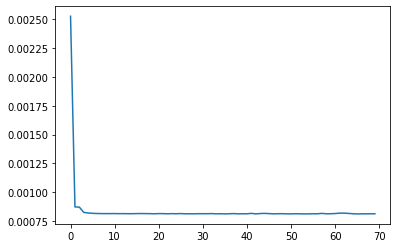

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=70,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))
print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))

plt.plot(history_track.history['loss'])
plt.show() 

RNN with 2 Hidden Layers 


63/63 - 0s - loss: 8.5505e-04 - mse: 8.5505e-04 - mae: 0.0252
R-sqaure : 0.5610866607621003
MSE : 0.0008550544735044241
MAE : 0.025242436677217484


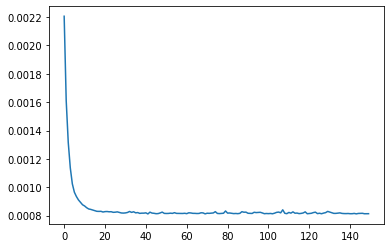

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=150,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))
print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))

plt.plot(history_track.history['loss'])
plt.show() 

RNN with 3 hidden layers

63/63 - 0s - loss: 8.7241e-04 - mse: 8.7241e-04 - mae: 0.0254
R-sqaure : 0.552178668832016
MSE : 0.0008724082144908607
MAE : 0.02542904205620289


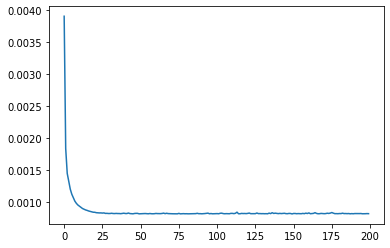

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=200,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))
print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))
plt.plot(history_track.history['loss'])

All three of the models are able to predict sequences with satisfactory accuracy. But larger models take more epochs and thus training time because of the larger number of parameters. 

# RNN For Moving Average Models

Dataset Creation

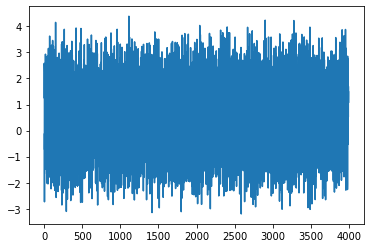

In [22]:
#Moving Average Model Parameters
a1 = 5
a2 = a3 = a4 = a5 = -1

values_from_uniform_distribution  = [random.uniform(0,1) for i in range(4000) ]
data = np.convolve(np.array(values_from_uniform_distribution), [a1,a2,a3,a4,a5], mode='valid')
plt.plot(data)
plt.show()
step = 5
trainX,trainY,testX,testY = prepare_for_RNN(data,step)

Model Training and Prediction

RNN with 1 Hidden Layer

63/63 - 0s - loss: 2.2512 - mse: 2.2512 - mae: 1.2950
R-sqaure : 0.09228378528883063
MSE : 2.2511720657348633
MAE : 1.2949696779251099


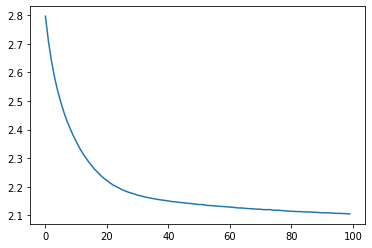

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    6, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=100,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))
print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))

plt.plot(history_track.history['loss'])
plt.show() 

RNN with 2 hidden layers

63/63 - 0s - loss: 2.2501 - mse: 2.2501 - mae: 1.2918
R-sqaure : 0.09270906064784223
MSE : 2.250117778778076
MAE : 1.2917728424072266


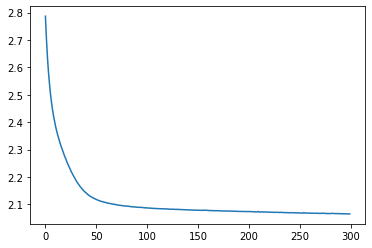

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=300,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))
print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))

plt.plot(history_track.history['loss'])
plt.show() 

RNN with 3 hidden layers

63/63 - 0s - loss: 2.2457 - mse: 2.2457 - mae: 1.2895
R-sqaure : 0.09450050149542077
MSE : 2.2456743717193604
MAE : 1.2894538640975952


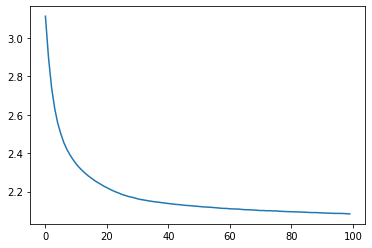

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=100,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))

print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))

plt.plot(history_track.history['loss'])
plt.show() 

Three of the models are able to capture the dependency in the values but RNNs fails when the information is to be retained for longer time. Bigger models tend to work better but on increasing number of epochs in training it is observed that there is little or no improvement. I think that is maybe because of the vainishing gradient problem.

# Detecting Temporal Order. 

Creating dataset and Custom Training Code

In [0]:
def create_dataset(size):
  seq = []
  labels = []
  for i in range(size):
    seq_len = random.randint(100, 110)
    t1 = random.randint(10,20)
    t2 = random.randint(33,43)
    t3 = random.randint(66,76)
    sequence = ""
    order = ""
    label = ""
    for i in range(seq_len):
      if i == 0:
        sequence+="E"
      elif i == seq_len - 1:
        sequence+="B"
      elif i == t1 or i == t2 or i == t3:
        temp = random.choice(['X','Y'])
        order+=temp
        sequence+=temp
      else:
        sequence+=random.choice(['a','b','c','d'])
    if order == "XXX":
          label+="Q"
    if order == "XXY":
        label+="R"
    if order == "XYX":
        label+="S"
    if order == "XYY":
        label+="U"
    if order == "YXX":
        label+="V"
    if order == "YXY":
        label+="A"
    if order == "YYX":
        label+="B"
    if order == "YYY":
        label+="C"
    seq.append(np.array(list(sequence)))
    labels.append(list(label))
  return np.array(seq), np.array(labels)
#one hot encoding
def encoding_sequence(seq):
  sequence = []
  for x in seq:
    y = []
    for i in range(len(x)):    
      if x[i] == "E" or x[i] == "B":
        y.append(int(8))
      elif x[i] == 'X':
        y.append(int(9))
      elif x[i] == 'Y':
        y.append(int(10))
      else:
        y.append(int(11))
    sequence.append(y)
  return sequence

def pre_processed_data(size):
  seq, labels = create_dataset(size)
  seq = encoding_sequence(seq)
  padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(seq,padding='post')
  #one-hot encoding
  encoded_data = [to_categorical(i) for i in padded_inputs]
  encoded_data = np.reshape(np.array(encoded_data),(size,110,12))
  # print(encoded_data.shape)
  #label encoder
  le = preprocessing.LabelEncoder()
  le.fit(labels)
  encoded_labels = le.transform(labels)
  depth = 8
  encoded_labels = tf.one_hot(encoded_labels, depth,
            on_value=1.0, off_value=0.0,
            axis=-1)
  encoded_labels = np.reshape(encoded_labels, (size,8))
  # print(encoded_labels.shape)
  return encoded_data, encoded_labels


def create_batch(n,features,label):
  trainX=[]
  trainY=[]
  randomlist = random.sample(range(0, 3999), n)
  for i in range(len(randomlist)):
    trainX.append(features[i])
    trainY.append(label[i])
  trainX = np.reshape(np.array(trainX),(len(randomlist),12,110))
  trainY = np.reshape(np.array(trainY),(len(randomlist),8))
  return trainX, trainY

def loss(loss_object, model, x, y, training):
  y_ = model(x, training=training)
  return loss_object(y_true=y, y_pred=y_)

def grad(loss_object,model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(loss_object,model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

def train_model(model,encoded_data, encoded_labels):
  loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
  # Keep results for plotting
  train_loss_results = []
  av_training_error = 0
  num_epochs = 0
  while True:
    num_epochs+=1
    epoch_loss_avg = tf.keras.metrics.Mean()
    x,y = create_batch(1,encoded_data,encoded_labels)
    loss_value, grads = grad(loss_object,model,x, y)
    optimizer.apply_gradients(zip(grads,model.trainable_variables))
    predictions = model(x)
    training_error = LA.norm(predictions - y, 1)
    av_training_error+= ( training_error - av_training_error)/num_epochs
    # Track progress
    epoch_loss_avg.update_state(loss_value)
    # End epoch
    train_loss_results.append(av_training_error)

    if num_epochs % 50 == 0:
      print("Epoch {:03d}: Loss: {:.3f}, Average Training Error: {:.3}, Training error: {:.3f} ".format(num_epochs,
                                                                  epoch_loss_avg.result(),av_training_error,training_error),flush="True")
      sys.stdout.flush()
    if av_training_error < 0.1:
      print("Training Ends")
      print("Epoch {:03d}: Loss: {:.3f}, Average Training Error: {:.3}, Training error: {:.3f} ".format(num_epochs,
                                                                  epoch_loss_avg.result(),av_training_error,training_error),flush="True")
      break

  #plotting training error vs number of sequences passed 
  fig = plt.figure()
  plt.plot(train_loss_results)
  fig.suptitle('Training Error vs Number of Sequences ', fontsize=20)
  plt.xlabel('Number of Sequences', fontsize=18)
  plt.ylabel('Training Error', fontsize=16)
  plt.show()
  return model


LSTM Model and Training 

Epoch 050: Loss: 1.390, Average Training Error: 0.506, Training error: 0.131 
Epoch 100: Loss: 1.301, Average Training Error: 0.284, Training error: 0.032 
Epoch 150: Loss: 1.288, Average Training Error: 0.197, Training error: 0.017 
Epoch 200: Loss: 1.283, Average Training Error: 0.151, Training error: 0.011 
Epoch 250: Loss: 1.281, Average Training Error: 0.123, Training error: 0.008 
Epoch 300: Loss: 1.279, Average Training Error: 0.104, Training error: 0.007 
Training Ends
Epoch 312: Loss: 1.279, Average Training Error: 0.0998, Training error: 0.006 


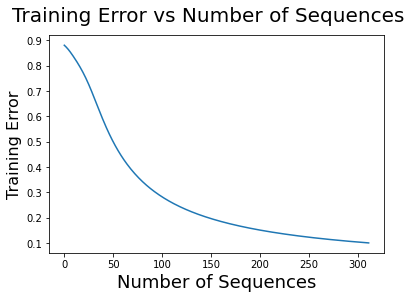

Average Number of missclassification: 2626.6


In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(2,return_sequences=True,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None),unit_forget_bias=False,bias_initializer= 'ones'),
    tf.keras.layers.LSTM(4,return_sequences=True,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None)),
    tf.keras.layers.LSTM(8,return_sequences=False,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None)),
    tf.keras.layers.Dense(8, activation='softmax')])
trainx, trainy = pre_processed_data(2000)
model = train_model(model,trainx,trainy)

#testing 
misclassification = []
for i in range(10):
  testx,testy = pre_processed_data(3000)
  y_pred = model(testx)
  error_vector = y_pred - testy
  training_error = np.apply_along_axis(LA.norm, 1, error_vector)
  misclassify_count=0
  for j in range(len(training_error)):
    if training_error[j] > 0.3:
      misclassify_count+=1
  misclassification.append(misclassify_count)
print("Average Number of missclassification: "  + str(np.mean(misclassification)))

RNN Model and Training

Epoch 050: Loss: 1.295, Average Training Error: 0.115, Training error: 0.025 
Training Ends
Epoch 060: Loss: 1.291, Average Training Error: 0.0991, Training error: 0.020 


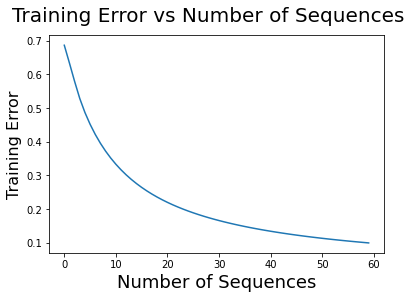

Average Number of missclassification: 2700.0


In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    12, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    10, activation='tanh',return_sequences=False))
model.add(tf.keras.layers.Dense(8,activation='softmax'))


trainx, trainy = pre_processed_data(2000)
train_model(model,trainx,trainy)

#testing 
misclassification = []
for i in range(10):
  misclassify_count=0
  testx,testy = pre_processed_data(3000)
  for j in range(3000):
    x,y = create_batch(1,testx,testy)
    y_pred = model(x)
    error_vector = y_pred - y
    training_error = np.apply_along_axis(LA.norm, 1, error_vector)
    if training_error > 0.3:
      misclassify_count+=1
  misclassification.append(misclassify_count)
print("Average Number of missclassification: "  + str(np.mean(np.array(misclassification))))

From the above experiment we can see that, RNN requires very less number of sequences to decrease the training error. That is I believe because of the less number of parameters as compared to LSTM. 

# Learning Long Term Dependencies

Dataset Creation 

In [0]:
#Preparing Dataset"
def dataset(total_samples):
    # total_samples = 2000
    DATA = []
    LABELS = []
    p = 100
    for j in range(total_samples):
      first_symbol_idx = random.choice([0,1])
      symbol_idxs = random.choices([i for i in range(2,p+1)],k=p)
      symbol_idxs.insert(0,first_symbol_idx)
      encoded_sequence = np.empty((p+1,p+1))
      for i in range(len(symbol_idxs)):
          one_hot_vector = np.zeros(p+1)
          one_hot_vector[symbol_idxs[i]] = 1
          encoded_sequence[i] = one_hot_vector
      DATA.append(encoded_sequence)
      label = [0,0]
      label[first_symbol_idx] = 1
      LABELS.append(label)
    return np.array(DATA), np.array(LABELS)

data,labels = dataset(4000)

Models 

LSTM Network


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



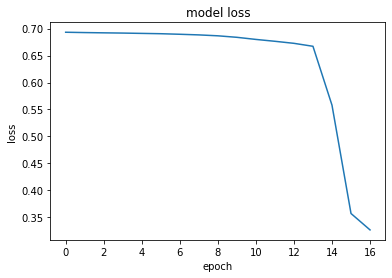

24/24 [==============================] - 0s 6ms/step - loss: 0.3239 - accuracy: 0.9997
The average accuracy in 10 trials: 0.9998666763305664


In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(10,return_sequences=False),
    tf.keras.layers.Dense(2, activation='softmax')])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])
history = model.fit(data,labels,
          validation_split=0.2,
          batch_size=128,
          epochs=17,verbose=0)


plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

av_acc = []
for i in range(10):
  test_data,test_labels = dataset(3000)
  results = model.evaluate(test_data, test_labels, batch_size=128)
  av_acc.append(results[1])
print("The average accuracy in 10 trials: " + str(np.mean(np.array(av_acc))))

RNN Model


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



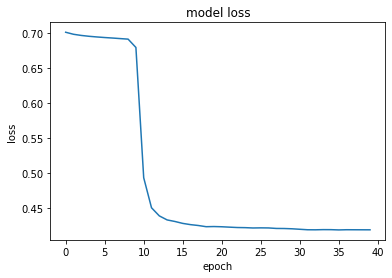

24/24 [==============================] - 0s 10ms/step - loss: 0.4308 - accuracy: 0.8833
The average accuracy in 10 trials: 0.8867333233356476


In [86]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    7, activation='tanh',return_sequences=False))
model.add(tf.keras.layers.Dense(2,activation='softmax'))


model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.SGD(0.1, momentum=0.2),
              metrics=['accuracy'])


history = model.fit(data,labels,
          validation_split=0.2,
          batch_size=128,
          epochs=40,verbose=0)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



av_acc = []
for i in range(10):
  test_data,test_labels = dataset(3000)
  results = model.evaluate(test_data, test_labels, batch_size=128)
  av_acc.append(results[1])
print("The average accuracy in 10 trials: " + str(np.mean(np.array(av_acc))))

Architecture for LSTM: One LSTM cell with 12 units for the hidden state. 
Architecture for RNN: One hidden layer with 7 units. 

I also triend bigger architectures but they were harder to train because of the higher number of parameters and less number of samples offered the model. 

LSTM was clearly better performing model when it came to extract long term dependencies from the model. 

# GANs

Generating dataset from the given distribution 

In [0]:
def create_samples(size):
  s1 = np.random.normal(0, 4, size)
  s2 = np.random.normal(-6, 4, size)
  s3 = np.random.normal(6, 4, size)
  return np.array((s1*0.4) + (s2*0.3) + (s3*0.3))

def sample_noise(m, n):
  return np.random.uniform(-80,80, size=[m, n])

In [0]:
class Discriminator(Model):
  def __init__(self):
    super(Discriminator, self).__init__()
    self.d1 = Dense(8, activation='relu')
    self.d2 = Dense(5, activation='relu')
    self.d3 = Dense(1)

  def call(self, x):
    x = self.d1(x)
    x = self.d2(x)
    return self.d3(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.d1 = Dense(8, activation='relu')
    self.d2 = Dense(5, activation='relu')
    self.d3 = Dense(1)

  def call(self, x):
    x = self.d1(x)
    x = self.d2(x)
    return self.d3(x)




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Iter: 0     D_lo

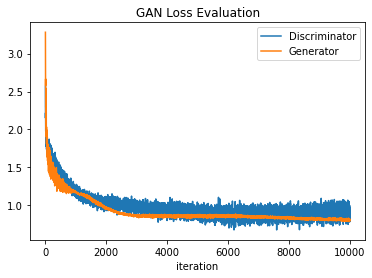

In [81]:
generator     = Generator()
discriminator = Discriminator()
optimizer = tf.optimizers.SGD(0.0001)

batch_size = 128

#generate data 
true_features = create_samples(10000)

D_losses = []
G_losses = []
epochs = 10000
for it in range(epochs):
  idx = np.random.randint(0, true_features.shape[0], batch_size)
  Real_sample = np.reshape(np.array(true_features[idx]),(batch_size,1))
  #training discriminator
  with tf.GradientTape() as tape:  
    Z           = sample_noise(batch_size, 1)
    Fake_sample = generator(Z)
    D_real_prob = discriminator(Real_sample)
    D_fake_prob = discriminator(Fake_sample)
    D_loss      = -tf.reduce_mean(tf.math.log(D_real_prob) + tf.math.log(1. - D_fake_prob))

  gradients = tape.gradient(D_loss, discriminator.trainable_weights)
  optimizer.apply_gradients(zip(gradients, discriminator.trainable_weights))
  #training generator
  with tf.GradientTape() as tape:        
    Z           = sample_noise(batch_size, 1)
    Fake_sample = generator(Z)
    D_fake_prob = discriminator(Fake_sample)
    
    G_loss   = -tf.reduce_mean(tf.math.log(D_fake_prob))
                
  gradients = tape.gradient(G_loss, generator.trainable_weights)
  optimizer.apply_gradients(zip(gradients, generator.trainable_weights))

  if it % 500 == 0:
        print('Iter: {}     D_loss: {:.4f}     G_loss: {:.4f}'.format(it, D_loss, G_loss))
        sys.stdout.flush()

  D_losses.append(D_loss)
  G_losses.append(G_loss)

plt.plot(D_losses)
plt.plot(G_losses)
plt.title('GAN Loss Evaluation')
plt.ylabel('')
plt.xlabel('iteration')
plt.legend(['Discriminator', 'Generator'],loc='upper right')
plt.show()





(array([293., 291., 288., 289., 300., 306., 303., 328., 289., 313.]),
 array([-7.99537599e+01, -6.39641631e+01, -4.79745662e+01, -3.19849694e+01,
        -1.59953725e+01, -5.77568110e-03,  1.59838212e+01,  3.19734180e+01,
         4.79630149e+01,  6.39526117e+01,  7.99422086e+01]),
 <a list of 10 Patch objects>)

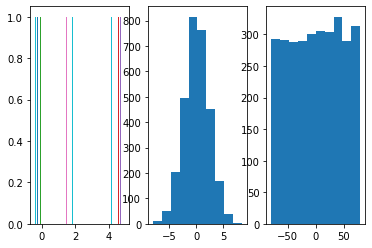

In [82]:
noise = sample_noise(3000,1)
generated_data = generator(noise)
plt.subplot(1,3,1)
plt.hist(generated_data)
plt.subplot(1,3,2)
plt.hist(create_samples(3000))
plt.subplot(1,3,3)
plt.hist(noise[:,0])

In [0]:
def pdf(data,mean,variance):
    s1 = 1/np.sqrt(2*np.pi*variance)
    s2 = np.exp(-(np.square(data-mean)/(2*variance)))
    return s1*s2

k=3 
X = generated_data.numpy().squeeze()
weights = np.ones((k))/k
means = np.random.choice(X,k)
variances = np.random.random_sample(size=k)
eps = 1e-8

for step in range(25):
    likelihood = []
    for j in range(k):
        likelihood.append(pdf(X,means[j],np.sqrt(variances[j])))
    likelihood = np.array(likelihood)
    b = []
    
    for j in range(k):
        b.append((likelihood[j]*weights[j])/(np.sum([likelihood[i] * weights[i] for i in range(k)],axis=0)+eps))
        means[j] = np.sum(b[j] *X)/(np.sum(b[j]+eps))
        variances[j] = np.sum(b[j]*np.square(X-means[j]))/(np.sum(b[j]+eps))
        weights[j] = np.mean(b[j])

KL Divergence: 18.327815488618402


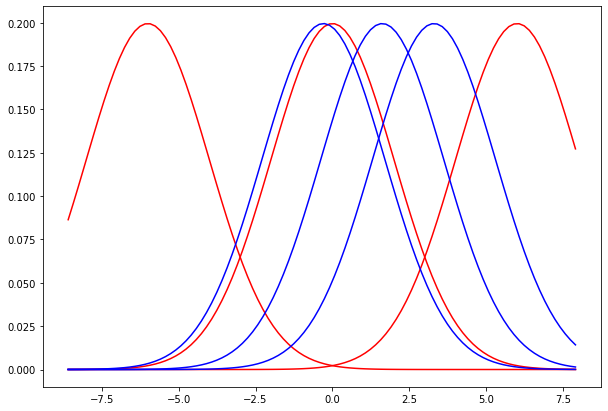

In [84]:
mu1 = 0 
mu2 = -6
mu3 = 6 

sigma = 4
X = create_samples(5000)
bins = np.linspace(np.min(X),np.max(X),100)

plt.figure(figsize=(10,7))


plt.plot(bins, pdf(bins, mu1, sigma), color='red', label="True pdf")
plt.plot(bins, pdf(bins, mu2, sigma), color='red')
plt.plot(bins, pdf(bins, mu3, sigma), color='red')
plt.plot(bins, pdf(bins, means[0], sigma), color='blue', label="False pdf")
plt.plot(bins, pdf(bins, means[1], sigma), color='blue')
plt.plot(bins, pdf(bins, means[2], sigma), color='blue')

p = means 
q = [mu1,mu2,mu3]

def kl_divergence(p,q):    
    return sum(p[i]*np.log(p[i]/(q[i]+0.00001))for i in range(len(p)))

print("KL Divergence: " + str(kl_divergence(p,q)))

